# Import Libraries

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy 
import sklearn 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler #imports Scaler function
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
# import anime dataset
anime = pd.read_csv(r'C:\Users\jecka\2023-12-05 Achievement 6\02 Data\Prepared Data\Anime-Cleaned.csv', index_col = False)

In [4]:
# folder shortcut path 
path = r'C:\Users\jecka\2023-12-05 Achievement 6'

# Consistancy checks

In [5]:
#check included data
anime.head()

,anime_id,title,country_origin,story_origin,type,score,scored_by,status,episodes,source,members,favorites,episode_duration,total_duration,rating,start_year,start_season,demographics,genres
0,1,Cowboy Bebop,Japan,Japan,tv,8.75,923377,finished_airing,26.0,original,1788584,79192,24.00,624.000000,R,1998.0,spring,NaN,Action / Award Winning / Sci-Fi
1,5,Cowboy Bebop: Tengoku no Tobira,Japan,Japan,movie,8.38,207777,finished_airing,1.0,original,363968,1477,115.18,115.183333,R,2001.0,summer,NaN,Action / Sci-Fi
2,6,Trigun,Japan,Japan,tv,8.22,359862,finished_airing,26.0,manga,733966,15265,24.67,641.333333,PG_13,1998.0,spring,NaN,Action / Adventure / Sci-Fi
3,7,Witch Hunter Robin,Japan,Japan,tv,7.25,43038,finished_airing,26.0,original,112755,618,25.00,650.000000,PG_13,2002.0,summer,NaN,Action / Drama / Mystery / Supernatural
4,8,Bouken Ou Beet,Japan,Japan,tv,6.94,6445,finished_airing,52.0,manga,15093,14,23.00,1196.000000,PG,2004.0,fall,NaN,Adventure / Fantasy / Supernatural


In [6]:
anime.columns

Index(['anime_id', 'title', 'country_origin', 'story_origin', 'type', 'score',
       'scored_by', 'status', 'episodes', 'source', 'members', 'favorites',
       'episode_duration', 'total_duration', 'rating', 'start_year',
       'start_season', 'demographics', 'genres'],
      dtype='object')

In [7]:
#check for missing values 
anime.isnull().sum()

anime_id                0
title                   0
country_origin          0
story_origin            0
type                   58
score                8933
scored_by               0
status                  0
episodes              547
source               3160
members                 0
favorites               0
episode_duration        0
total_duration          0
rating                579
start_year            867
start_season         4681
demographics        23328
genres               4987
dtype: int64

# Creating Subset

In [8]:
# creating a subset to remove null values and only focussing on numerical values
sub = anime[['score', 'scored_by', 'episodes', 'total_duration', 'members', 'favorites', 'start_year']].dropna()

In [9]:
sub.shape

(15950, 7)

In [10]:
scaler=StandardScaler() #sets 'scaler' as a shortcut

In [11]:
columns=sub.columns.values.tolist() #create a list of column names for your df
columns #list the columns

['score',
 'scored_by',
 'episodes',
 'total_duration',
 'members',
 'favorites',
 'start_year']

In [12]:
sub_scaled=pd.DataFrame(scaler.fit_transform(sub), columns=columns) #run the scaler on your df to a new 'df_scaled'
sub_scaled.head() #show scaled df

,score,scored_by,episodes,total_duration,members,favorites,start_year
0,2.591543,7.639356,0.308084,0.614459,8.903964,14.993837,-0.652247
1,2.180393,1.521007,-0.214125,-0.152458,1.573636,0.154485,-0.442882
2,2.002598,2.821327,0.308084,0.640585,3.477452,2.787245,-0.652247
3,0.924716,0.112495,0.308084,0.653648,0.281025,-0.009538,-0.373094
4,0.580238,-0.200373,0.851182,1.476609,-0.221493,-0.124869,-0.233517


In [13]:
sub #compare with original subset

,score,scored_by,episodes,total_duration,members,favorites,start_year
0,8.75,923377,26.0,624.000000,1788584,79192,1998.0
1,8.38,207777,1.0,115.183333,363968,1477,2001.0
2,8.22,359862,26.0,641.333333,733966,15265,1998.0
3,7.25,43038,26.0,650.000000,112755,618,2002.0
4,6.94,6445,52.0,1196.000000,15093,14,2004.0
...,...,...,...,...,...,...,...
24809,5.74,218,1.0,3.000000,464,0,2023.0
24816,5.86,1767,1.0,23.683333,5601,8,2023.0
24909,6.44,143,1.0,3.383333,288,4,2023.0
24939,6.73,139,1.0,1.000000,260,1,2023.0


In [14]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [15]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub_scaled).score(sub_scaled) for i in range(len(kmeans))] 
#I was given many warnings which took up a lot of space so I merely cleared the output

C:\Users\jecka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jecka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jecka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jecka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [16]:
score

[-111649.99999999997,
 -83523.63903828591,
 -68321.84605909289,
 -56151.65278997923,
 -47838.28052584045,
 -40120.25131864148,
 -35405.63620529668,
 -31324.159744314333,
 -28029.742518661256]

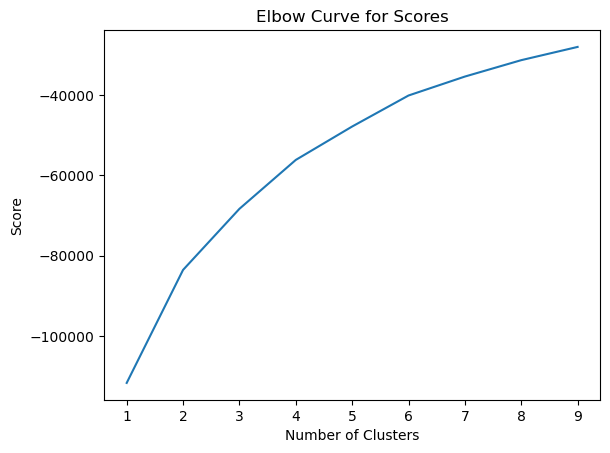

In [17]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve for Scores')
pl.show()

The elbow is where the curve begins to flatten. Here I am using a scaled version so although the elbow looks to begin at 2, I will still have the clusters at 3.

In [18]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(sub_scaled)

C:\Users\jecka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

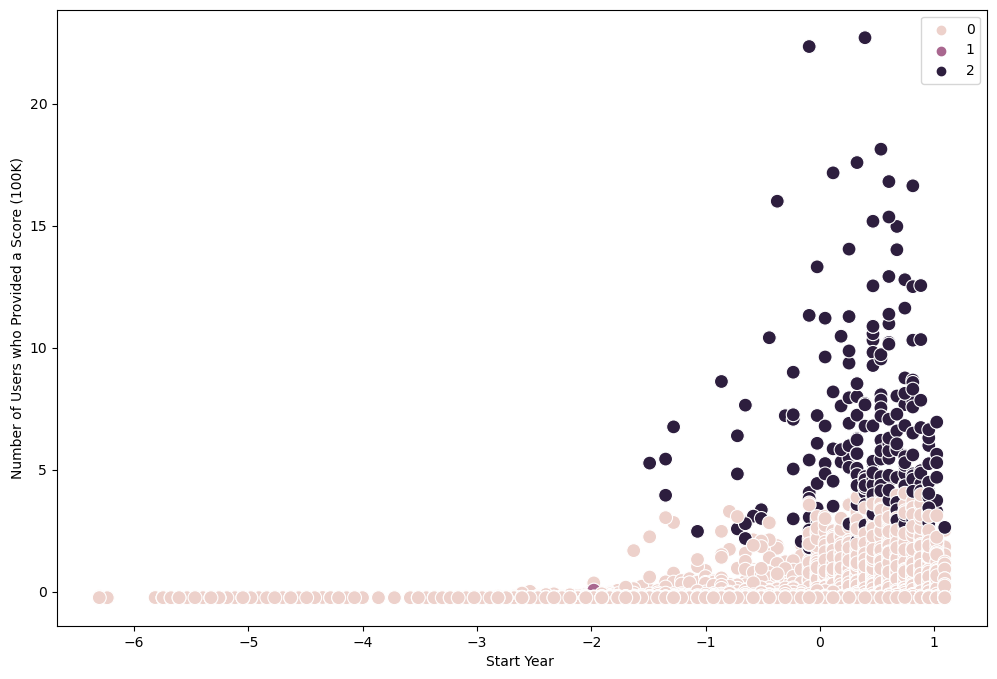

In [19]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_scaled['start_year'], y=sub_scaled['scored_by'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Year ') # Label x-axis.
plt.ylabel('Number of Users who Provided a Score (100K)') # Label y-axis.
plt.show()

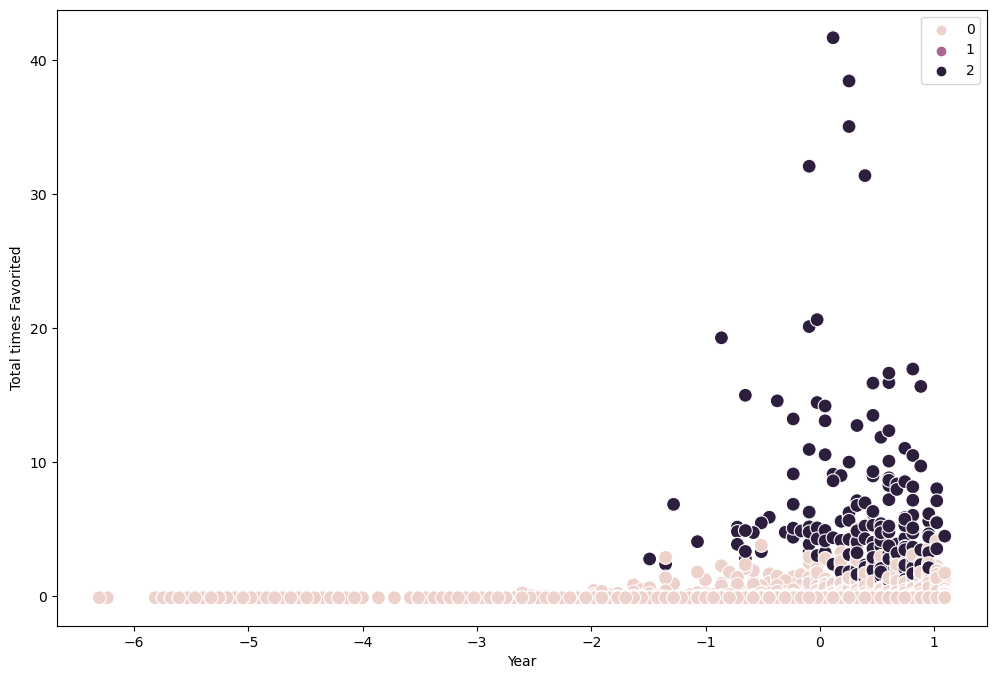

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_scaled['start_year'], y=sub_scaled['favorites'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Total times Favorited') # Label y-axis.
plt.show()

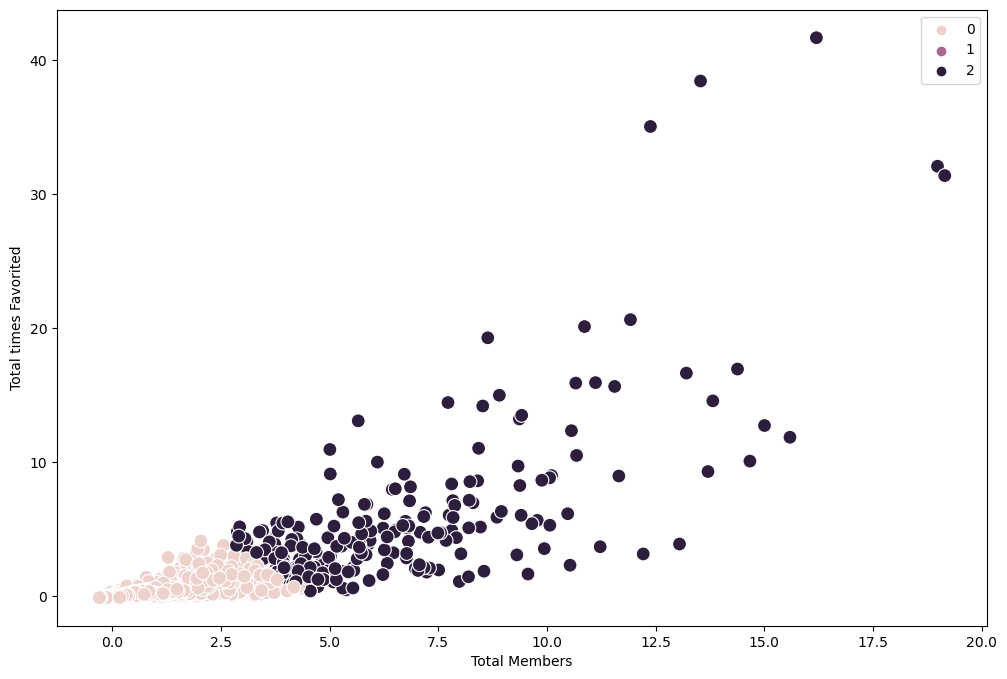

In [21]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_scaled['members'], y=sub_scaled['favorites'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Members') # Label x-axis.
plt.ylabel('Total times Favorited') # Label y-axis.
plt.show()

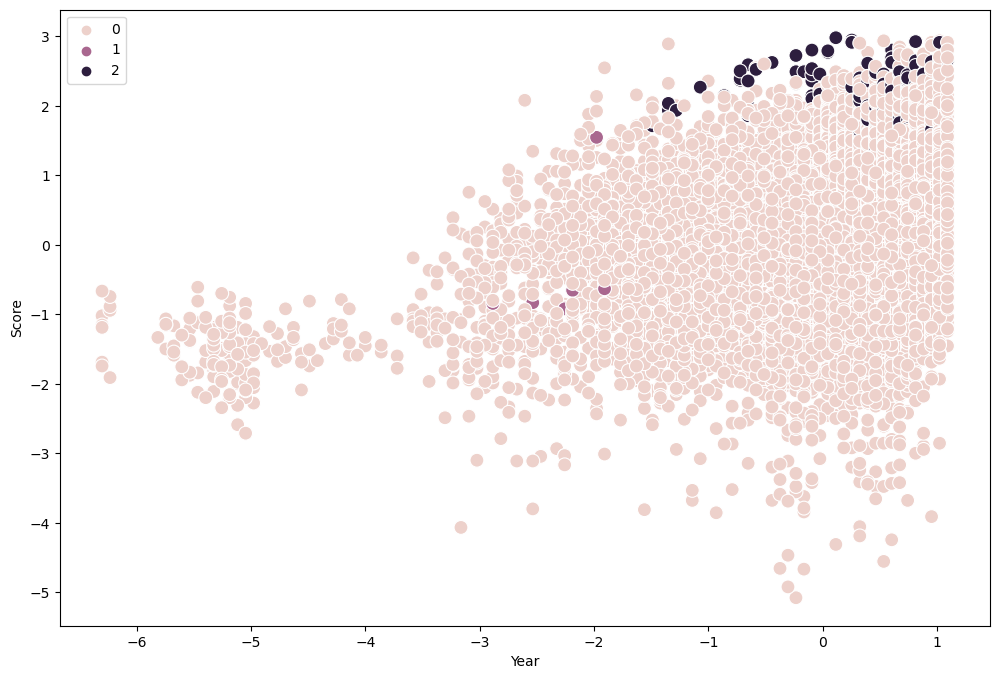

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_scaled['start_year'], y=sub_scaled['score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

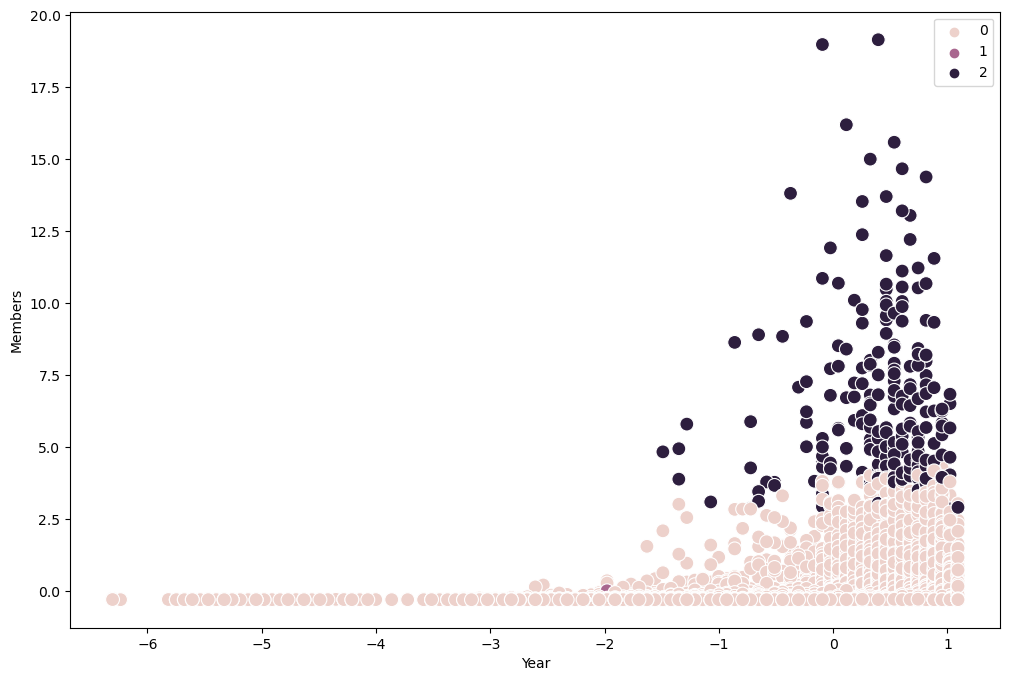

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_scaled['start_year'], y=sub_scaled['members'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Members') # Label y-axis.
plt.show()

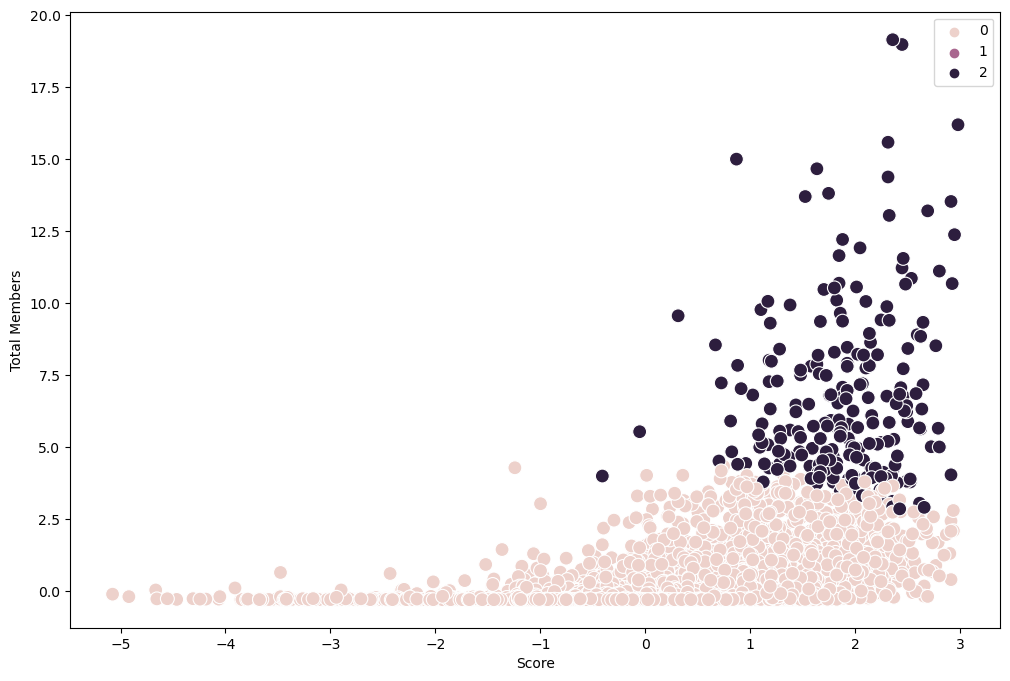

In [24]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_scaled['score'], y=sub_scaled['members'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Score') # Label x-axis.
plt.ylabel('Total Members') # Label y-axis.
plt.show()

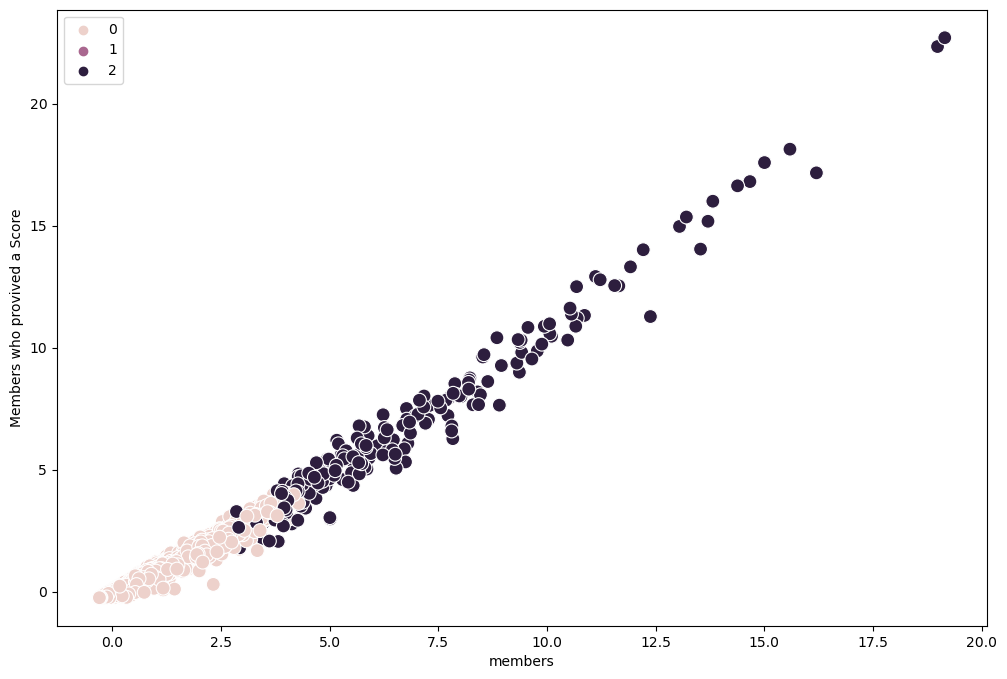

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_scaled['members'], y=sub_scaled['scored_by'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('members') # Label x-axis.
plt.ylabel('Members who provived a Score') # Label y-axis.
plt.show()

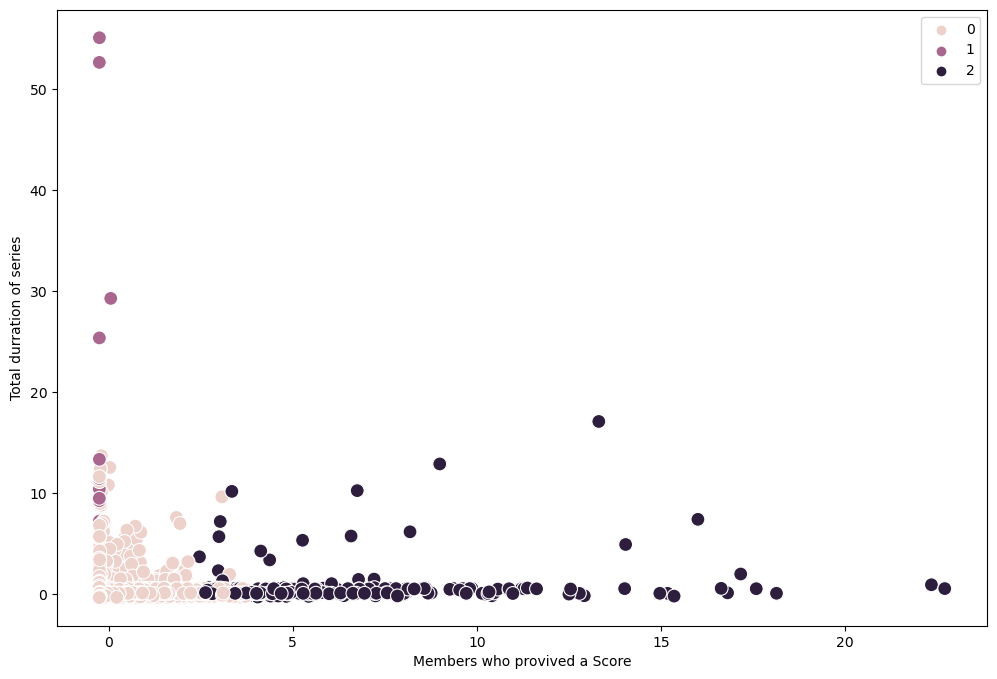

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_scaled['scored_by'], y=sub_scaled['total_duration'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Members who provived a Score') # Label x-axis.
plt.ylabel('Total durration of series') # Label y-axis.
plt.show()

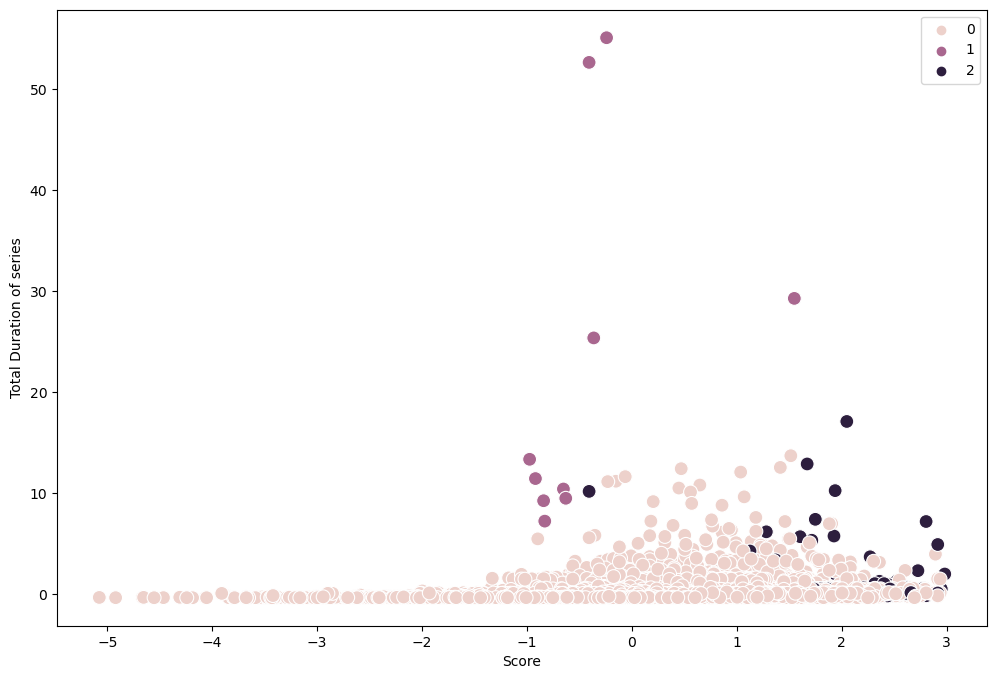

In [27]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_scaled['score'], y=sub_scaled['total_duration'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Score') # Label x-axis.
plt.ylabel('Total Duration of series') # Label y-axis.
plt.show()

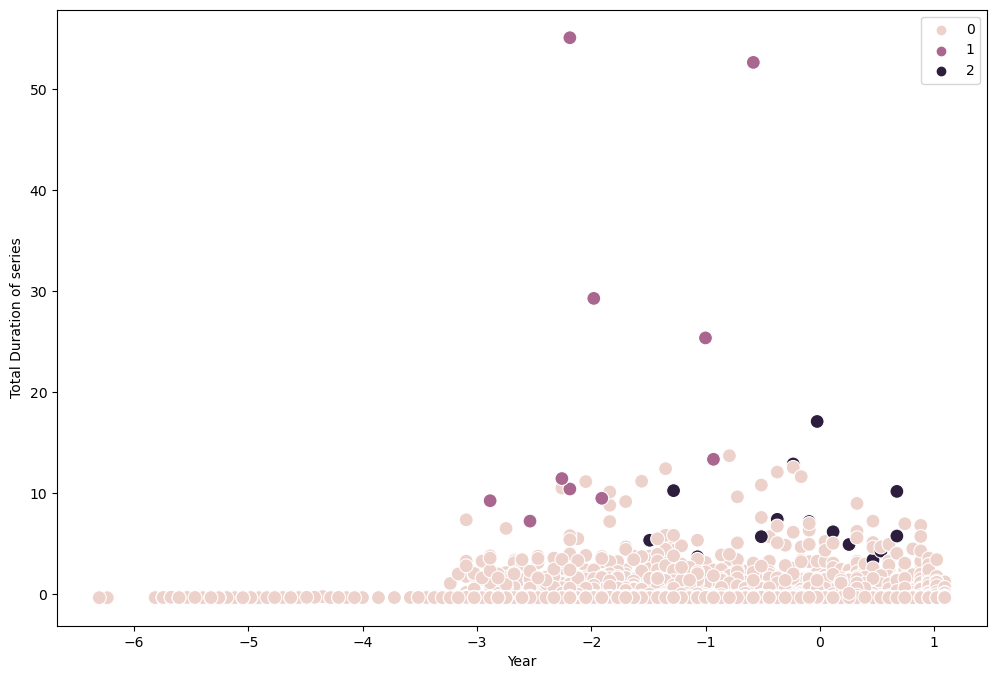

In [28]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_scaled['start_year'], y=sub_scaled['total_duration'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Total Duration of series') # Label y-axis.
plt.show()

In [29]:
#Checking to make sure the dataframes match up
len(kmeans.labels_) == len(sub)

True

In [30]:
#applying results to original subset
sub['clusters'] = kmeans.labels_
sub['clusters'].value_counts() #checking values

clusters
0    15716
2      224
1       10
Name: count, dtype: int64

The lightest color (0) appears the most, followed by the darkest (2).

## checking the clusters as groups 

In [31]:
#create a column that renames the clusters to colors 
sub.loc[sub['clusters'] == 0, 'cluster'] = 'peach'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'black'

In [32]:
sub.groupby('cluster').agg({
    'score':['mean','median'],
    'members':['mean','median'],
    'favorites':['mean','median']
})

score              members                favorites         
             mean median          mean     median          mean   median
cluster                                                                 
black    8.116652   8.15  1.341406e+06  1163547.0  29990.308036  21107.0
peach    6.393870   6.40  3.988132e+04     4644.0    250.407483      7.0
purple   6.029000   5.84  6.849200e+03      844.5     58.200000      1.0

## Conlusion

The clusters highlight distinct patterns in anime scores, popularity (member count), and fan engagement (favorites count). The 'Black' cluster represents anime with moderate scores, modest popularity, and moderate fan engagement. 'Peach' signifies anime with lower scores, less popularity, and minimal fan engagement, possibly indicating niche or less mainstream content. 'Pink' stands out for its high scores, extensive popularity, and strong fan base, suggesting exceptionally well-received and widely-loved anime. Each cluster offers unique insights into the characteristics and reception of anime within different audience segments, though additional analysis may reveal further nuances and potential biases.

## Usefulness

Clustering in the anime industry brings about a more dynamic and responsive ecosystem. Using clustering can lead to enhancing content delivery, fan engagement, and overall industry success. The ability to adapt strategies based on viewer preferences contributes to a thriving anime landscape.